## Introduction

Hello Kaggle~! I'm Jon and happy to be a part of this competition. I'm excited by data science and am currently finishing up a bootcamp. Hopefully my contributions will help someone out while I further my learning. 

I started by looking at Bojan Tunguz's kernel available here: https://www.kaggle.com/tunguz/yaeda-yet-another-eda. I'm going to be making a lot of revisions as I progress towards better predictions.

Welcome to the Santander Value Prediction Challenge. Santander Bank is looking to personalize service for their broad customer base. To do this they are looking to predict the value of transactions for each potential customer, and that's where we come in. 

We are given both testing and training data sets which will we look into and analyze. It is important to note that because this is sensitive banking data it has been anonymized meaning we will need to rely on statistical results as opposed to domain knowledge for feature engineering. Unfortunately unless Santander releases more data, the data we have will not be expanded, but that doesn't stop feature engineering. I cleaned the data by checking for empty values, of which there were none, and removing any columns comprised entirely of zeros.

#### Imports
This includes Pandas, numpy, matplotlib, and seaborn for essential python operations. 
But it also includes all of our machine learning tools including: Linear Regression, SVR, Lasso Regression, and Random Forest Regressor. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Data Entry
The data is available through the kaggle competition's webpage: https://www.kaggle.com/c/santander-value-prediction-challenge/data

In [2]:
# Change the working directory
# ATTN: You will need to change this locally.
os.chdir('C:/Users/jonda/OneDrive/Documents/Springboard/Santander_Capstone')

# Read in the csv's for test, and train data sets.
test_df  = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

### Exploratory Data Analysis

#### Heads

In [3]:
# Take a first look at the training set
train_df.head(5)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [4]:
# Take a first look at the testing set
test_df.head(5)

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Santander did remark that this data is sparse, we will need to look into just how spare to determine which of the nearly 5000 columns contribute non-zero values and drop any irrelevant columns. We will also want to:
- Check for missing values
- Determine if all of the columns in test exist in train, and vice versa sans target 
- Do some initial plotting

#### Missing Values

In [5]:
test_df.isnull().values.any()

False

In [6]:
train_df.isnull().values.any()

False

Thankfully there are no missing values, so we will be able to skip imputation for now.

#### Column name verification

In [7]:
train_columns = list(train_df.columns.values)

In [8]:
test_columns  = list(test_df.columns.values)

In [9]:
set(train_columns) - set(test_columns)

{'target'}

All the columns from the training set, sans target, are accounted for in the test set. 

#### Shapes

In [10]:
train_df.shape

(4459, 4993)

In [11]:
test_df.shape

(49342, 4992)

It's certainly odd that the test_df is 11 times larger than the training set. There was some concern that perhaps the sets were swapped but Santander has verified that the data sets are correct. The larger training set force the model to actually be predictive. If it can predict a much larger audience of users then it is indicative that the model keyed into actual signal instead of 'getting lucky' with noise,.

#### Target plot

In [12]:
# A couple style settings
sns.set_style("whitegrid")
sns.set_context("poster")

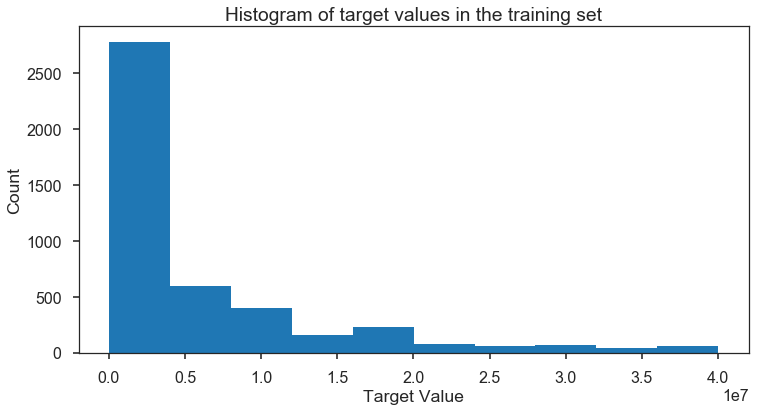

<Figure size 432x288 with 0 Axes>

In [52]:
plt.figure(figsize = (12, 6))
plt.hist(train_df['target'])
plt.title('Histogram of target values in the training set')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.show()
plt.clf()

Once you realize that the x-axis of this plot is scalled by 1e7 it makes perfect sense. Most customers at a bank have fewer than 1,000,000 dollar valuations, while some certainly do have higher valuations and one aspect of this project is to learn which customers will yield those high valuations thanks to the other anonymized properties, which for conversations sake I will assume are asset types such as stocks, registered collectibles, or bonds. Looking at a cumulative plot should help shed light on this this.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


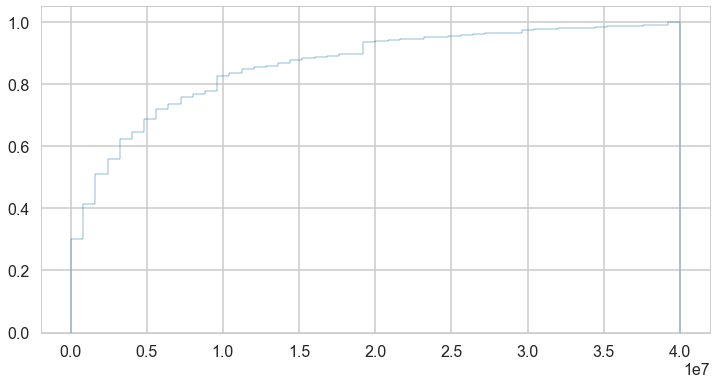

In [14]:
x = train_df['target']

fig, ax = plt.subplots(figsize=(12, 6))
n_bins = 50

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, normed=1, histtype='step',
                           cumulative=True, label='Empirical')

#### Target Statistics

In [15]:
train_df['target'].describe()

count    4.459000e+03
mean     5.944923e+06
std      8.234312e+06
min      3.000000e+04
25%      6.000000e+05
50%      2.260000e+06
75%      8.000000e+06
max      4.000000e+07
Name: target, dtype: float64

#### How sparse is the feature data?
We have nearly 5000 feature columns, but from the .head() they seem to be quite sparse. But just how sparse are they? If any columns are entirely zero then they should affect all predictions equally and should be removed to save complexity. Let's remove those columns first.

In [16]:
train_df.columns.values

array(['ID', 'target', '48df886f9', ..., 'fb36b89d9', '7e293fbaf',
       '9fc776466'], dtype=object)

In [17]:
# Drop all columns that consist of only zeros.
df = train_df.loc[:, (train_df != 0).any(axis=0)]

In [18]:
df.shape

(4459, 4737)

In [19]:
df.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


In [20]:
nz = list(df.columns.values) 
nz.remove('ID')
nz.remove('target')
type(nz)

list

In [21]:
# This next bit was inspired by Bojan Tunguz's idea to determine just how sparse each column is
# https://www.kaggle.com/tunguz/yaeda-yet-another-eda
train_nz = pd.DataFrame({'Percentile':((df[nz].values)==0).mean(axis=0),
                           'Column' : nz})
train_nz.head(5)

,Percentile,Column
0,0.991254,48df886f9
1,0.999103,0deb4b6a8
2,0.992599,34b15f335
3,0.999551,a8cb14b00
4,0.998879,2f0771a37


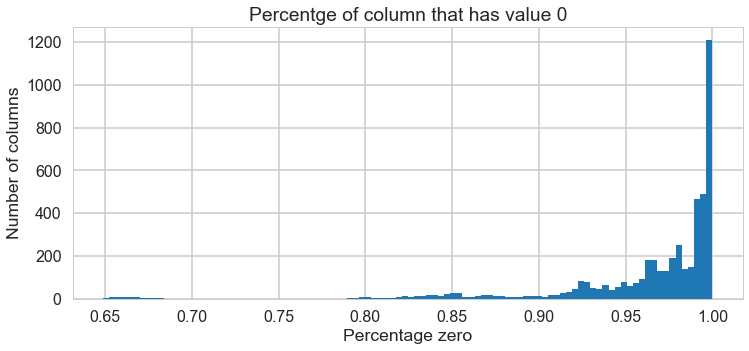

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize = (12,5))
plt.hist(train_nz['Percentile'], bins = 100)
plt.title('Percentge of column that has value 0')
plt.xlabel('Percentage zero')
plt.ylabel('Number of columns')
plt.show()
plt.clf()

In [23]:
train_nz['Percentile'].describe()

count    4735.000000
mean        0.966840
std         0.048625
min         0.649024
25%         0.959632
50%         0.984301
75%         0.996636
max         0.999776
Name: Percentile, dtype: float64

Notice how the 50th percentile is far above the mean, this is due to the low minimum value and the upper bound on the highest values. More interseting is that standard deviation is 4% while our values are incredibly tightly packed. This tells us that vast majority of features are very underused by the public. Perhaps this is a wide varity of assets and stocks for individual companies. As there are an massive amount of companies to invest in, many are left with few investors. 

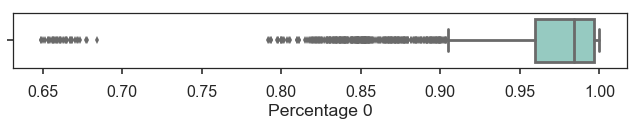

<Figure size 432x288 with 0 Axes>

In [53]:
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(11, 1)
sns.boxplot(x="Percentile",
            data=train_nz, palette="Set3", ax = ax)
plt.xlabel('Percentage 0')
plt.show()
plt.clf()

The cluster on the far left of the plot is particularly interesting. Those columns have the most nonzero data points.

### Machine Learning

#### Which methods to try?
Because we are attempting to predict a value we will look at regression methods. Because of the medium size of our sample we should have a wide range of options. So we will begin with the simplest model, Linear Regression, and from there examine Support Vector Machine Regressors, Lasso Regression, and Random Forest Regressors.

To give ourself a baseline our first submission will simply use all the data and no hyperparameter tuning.

In [25]:
# The approach for machine learning was also inspired by Bojan Tunguz's work
y_train = train_df.target.values
print('y shape: ', y_train.shape)
X_train = train_df[nz]
print('\n')
print('X_train 5 line head below: ')
X_train.head(5)

y shape:  (4459,)


X_train 5 line head below: 


,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [26]:
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

preds = clf.predict(test_df[nz])

In [27]:
sample_submission = pd.read_csv("C:/Users/jonda/OneDrive/Documents/Springboard/Santander_Capstone/sample_submission.csv")
sample_submission.target = preds
sample_submission.to_csv('simple_rfr_all_default.csv', index=False)
sample_submission.head()

,ID,target
0,000137c73,5.624400e+06
1,00021489f,4.650000e+06
2,0004d7953,4.639160e+06
3,00056a333,1.118478e+07
4,00056d8eb,4.000000e+05


This default RandomForestRegressor scored 1.73. There is much work to be done! Thankfully we are planning to do more than just an all default RandomForestRegressor.

### Random Forest Regressor Tuning
#### ATTN: 
This section takes a long time to run as it was set to run off of one core for stability purposed. The result is used in the Random Forest Regressor with Tuned Parameters section. Uncomment the code if you would like to run the notebook with it. 

In [28]:
############### Start: Randomized Search CV ##################################

# Look at parameters used by our current forest

rf = RandomForestRegressor()

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
{'max_depth': [5, 10, 15, 20, 25, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15, 100],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200]}


Warning: This next section can take a long time to run as it was set to run off of one core for stability.

In [29]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)

# Fit the random search model
# In order to test these models I will need to do a train test split with the training data-set. 
X_train, X_test, y_train, y_test = train_test_split(train_df[nz], train_df.target.values, test_size=0.2)


# rf_random.fit(X_train, y_train)

Set up the evaluate function

In [30]:
# Evaluation of Random Search
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = np.sqrt(mean_squared_error(y_test, predictions))
    print('Model Performance')
    print('MSE of: ', errors)
    
    return errors

This section can only be ran after running the rf_random.fit() block

In [31]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)


best_random = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
best_random.fit(X_train , y_train)

random_accuracy = evaluate(best_random, X_test, y_test)

print('\n')
print('Base Accuracy: ', base_accuracy)
print('\n')
print('Random Accuracy: ', random_accuracy)
print('Improvement of {:0.2f}%.'.format((random_accuracy - base_accuracy) / base_accuracy)*-1)

print('\n')
print('RF_Randomized_Search_CV')
print('\n')


# =============================================================================
# Best param set for random forest regression on Registered Users
# =============================================================================
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
#           max_features='sqrt', max_leaf_nodes=None,
#           min_impurity_decrease=0.0, min_impurity_split=None,
#           min_samples_leaf=2, min_samples_split=5,
#           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
#           oob_score=False, random_state=None, verbose=0, warm_start=False)
# =============================================================================

################# End: Randomized Search CV ##################################

Model Performance
MSE of:  7840928.49858625
Model Performance
MSE of:  7210576.887969937


Base Accuracy:  7840928.49858625


Random Accuracy:  7210576.887969937



RF_Randomized_Search_CV




RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### All features searched forest submission

In [32]:
y_train = train_df.target.values
X_train = train_df[nz]


clf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

clf.fit(X_train, y_train)

preds = clf.predict(test_df[nz])

sample_submission = pd.read_csv("C:/Users/jonda/OneDrive/Documents/Springboard/Santander_Capstone/sample_submission.csv")
sample_submission.target = preds
sample_submission.to_csv('simple_rfr_searchCV_all_features.csv', index=False)
sample_submission.head()

,ID,target
0,000137c73,5.424339e+06
1,00021489f,4.730273e+06
2,0004d7953,4.989290e+06
3,00056a333,9.385786e+06
4,00056d8eb,4.567705e+06


This did not improve performance significantly so we are going to pursue more refine feature selection and consider only the cluster of values with fewer than 70% zeros.

In [33]:
train_nz['Percentile'].describe()

count    4735.000000
mean        0.966840
std         0.048625
min         0.649024
25%         0.959632
50%         0.984301
75%         0.996636
max         0.999776
Name: Percentile, dtype: float64

In [34]:
sub_seventy = pd.DataFrame(train_nz.loc[train_nz['Percentile'] < 0.7])
sub_seventy_col_series = sub_seventy['Column']
sub_seventy_col = list(sub_seventy_col_series)

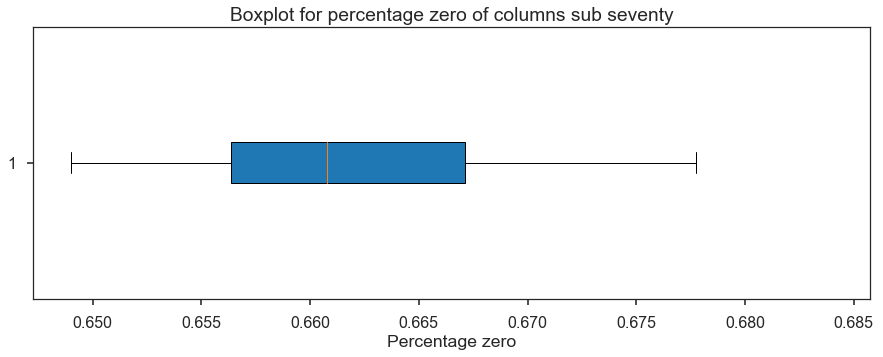

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure(figsize = (15,5))
plt.boxplot(sub_seventy['Percentile'], patch_artist = True, vert = False)
plt.title('Boxplot for percentage zero of columns sub seventy')
plt.xlabel('Percentage zero')
plt.show()
plt.clf()

In [36]:
len(sub_seventy_col)

40

In [37]:
sub_seventy_df = train_df[sub_seventy_col]

In [38]:
sub_seventy_df['target'] = train_df['target']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
sub_seventy_df.head(3)

,20aa07010,963a49cdc,26fc93eb7,0572565c2,66ace2992,fb49e4212,6619d81fc,6eef030c1,fc99f9426,1db387535,...,5c6487af1,f190486d6,f74e8f13d,c5a231d81,e176a204a,1702b5bf0,190db8488,c47340d97,23310aa6f,target
0,0.0,13200000.0,3205000.0,400000.0,0.0,0.0,400000.0,900000.0,0.0,0.0,...,0.0,1866666.66,1733333.34,0.0,0.0,0.0,0.0,0.0,0.0,38000000.0
1,2200000.0,0.0,0.0,0.0,0.0,0.0,0.0,800000.0,0.0,0.0,...,0.0,0.00,0.00,0.0,0.0,16000000.0,0.0,0.0,0.0,600000.0
2,0.0,12000000.0,0.0,0.0,5500000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0


In [40]:
sub_seventy_y = sub_seventy_df['target']
sub_seventy_X = sub_seventy_df.loc[: , sub_seventy_df.columns != 'target']

train = train_df[sub_seventy_col]
test = test_df[sub_seventy_col]

### Linear Regression

In [41]:
# Functions from Haim Feldman's kernal: https://www.kaggle.com/haimfeld87/randomforest-with-50-features

#Linear Regression 

X = train_df[sub_seventy_col]
y_train = train_df['target']

Y = train_df['target']
Y = np.log(Y+1)

test_id = test_df.ID

def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y
    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())


kf = model_selection.KFold(n_splits=10, shuffle=True)
def runRF(x_train, y_train,x_test, y_test,test):
    #model=RandomForestRegressor(bootstrap=True, max_features=0.75, min_samples_leaf=11, min_samples_split=13, n_estimators=100)
    model =  linear_model.LinearRegression()
    model.fit(x_train, y_train)
    y_pred_train=model.predict(x_test)
    mse=rmsle(np.exp(y_pred_train)-1,np.exp(y_test)-1)
    y_pred_test=model.predict(test)
    return y_pred_train,mse,y_pred_test

pred_full_test_RF = 0    
rmsle_RF_list=[]

for dev_index, val_index in kf.split(train):
    dev_X, val_X = train.loc[dev_index], train.loc[val_index]
    dev_y, val_y = Y.loc[dev_index], Y.loc[val_index]
    ypred_valid_RF,rmsle_RF,ytest_RF=runRF(dev_X, dev_y, val_X, val_y,test)
    print("fold_ RF _ok "+str(rmsle_RF))
    rmsle_RF_list.append(rmsle_RF)
    pred_full_test_RF = pred_full_test_RF + ytest_RF
    
rmsle_RF_mean=np.mean(rmsle_RF_list)
print("Mean cv score : ", np.mean(rmsle_RF_mean))
ytest_RF=pred_full_test_RF/10


ytest_RF = np.exp(ytest_RF)-1
out_df = pd.DataFrame(ytest_RF)
out_df.columns = ['target']
out_df.insert(0, 'ID', test_id)
out_df.to_csv("Linear_" + str(rmsle_RF_mean) + "_.csv", index=False)

fold_ RF _ok 1.6807597255555624
fold_ RF _ok 1.658963882497836
fold_ RF _ok 1.6734472422643494
fold_ RF _ok 1.6465780121740785
fold_ RF _ok 1.759678627875896
fold_ RF _ok 1.7477627635144912
fold_ RF _ok 1.7216670274245913
fold_ RF _ok 1.6565078128434014
fold_ RF _ok 1.7041848360121687
fold_ RF _ok 1.6299764960499137
Mean cv score :  1.687952642621229


This model was fast and to some degree effective.

### Support Vector Machine Regression (SVR)

In [42]:
# Functions from Haim Feldman's kernal: https://www.kaggle.com/haimfeld87/randomforest-with-50-features

#SVM 
X = train_df[sub_seventy_col]
y_train = train_df['target']
                   
Y = train_df['target']
Y = np.log(Y+1)

test_id = test_df.ID

def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y
    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())


kf = model_selection.KFold(n_splits=10, shuffle=True)
def runRF(x_train, y_train,x_test, y_test,test):
    #model=RandomForestRegressor(bootstrap=True, max_features=0.75, min_samples_leaf=11, min_samples_split=13, n_estimators=100)
    model =  SVR(C=1.0, epsilon=0.2)
    model.fit(x_train, y_train)
    y_pred_train=model.predict(x_test)
    mse=rmsle(np.exp(y_pred_train)-1,np.exp(y_test)-1)
    y_pred_test=model.predict(test)
    return y_pred_train,mse,y_pred_test

pred_full_test_RF = 0    
rmsle_RF_list=[]

for dev_index, val_index in kf.split(train):
    dev_X, val_X = train.loc[dev_index], train.loc[val_index]
    dev_y, val_y = Y.loc[dev_index], Y.loc[val_index]
    ypred_valid_RF,rmsle_RF,ytest_RF=runRF(dev_X, dev_y, val_X, val_y,test)
    print("fold_ RF _ok "+str(rmsle_RF))
    rmsle_RF_list.append(rmsle_RF)
    pred_full_test_RF = pred_full_test_RF + ytest_RF
    
rmsle_RF_mean=np.mean(rmsle_RF_list)
print("Mean cv score : ", np.mean(rmsle_RF_mean))
ytest_RF=pred_full_test_RF/10


ytest_RF = np.exp(ytest_RF)-1
out_df = pd.DataFrame(ytest_RF)
out_df.columns = ['target']
out_df.insert(0, 'ID', test_id)
out_df.to_csv("SVM_" + str(rmsle_RF_mean) + "_.csv", index=False)

fold_ RF _ok 1.8281178071325022
fold_ RF _ok 1.7703469430688565
fold_ RF _ok 1.745064250881566
fold_ RF _ok 1.8094157302365697
fold_ RF _ok 1.7640107206299873
fold_ RF _ok 1.760506599279771
fold_ RF _ok 1.7054337533265025
fold_ RF _ok 1.7469386037389394
fold_ RF _ok 1.6815469644341334
fold_ RF _ok 1.7796010464764256
Mean cv score :  1.7590982419205254


This model was not as fast as linear regression and had a worse mean cv score. We won't be pursuing SVR further.

### Lasso Regression

In [43]:
# Functions from Haim Feldman's kernal: https://www.kaggle.com/haimfeld87/randomforest-with-50-features

# Lasso Regression

X = train_df[sub_seventy_col]
y_train = train_df['target']

Y = train_df['target']
Y = np.log(Y+1)

test_id = test_df.ID

def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y
    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())


kf = model_selection.KFold(n_splits=10, shuffle=True)
def runRF(x_train, y_train,x_test, y_test,test):
    #model=RandomForestRegressor(bootstrap=True, max_features=0.75, min_samples_leaf=11, min_samples_split=13, n_estimators=100)
    model = Lasso(random_state=0)
    model.fit(x_train, y_train)
    y_pred_train=model.predict(x_test)
    mse=rmsle(np.exp(y_pred_train)-1,np.exp(y_test)-1)
    y_pred_test=model.predict(test)
    return y_pred_train,mse,y_pred_test

pred_full_test_RF = 0    
rmsle_RF_list=[]

for dev_index, val_index in kf.split(train):
    dev_X, val_X = train.loc[dev_index], train.loc[val_index]
    dev_y, val_y = Y.loc[dev_index], Y.loc[val_index]
    ypred_valid_RF,rmsle_RF,ytest_RF=runRF(dev_X, dev_y, val_X, val_y,test)
    print("fold_ RF _ok "+str(rmsle_RF))
    rmsle_RF_list.append(rmsle_RF)
    pred_full_test_RF = pred_full_test_RF + ytest_RF
    
rmsle_RF_mean=np.mean(rmsle_RF_list)
print("Mean cv score : ", np.mean(rmsle_RF_mean))
ytest_RF=pred_full_test_RF/10


ytest_RF = np.exp(ytest_RF)-1
out_df = pd.DataFrame(ytest_RF)
out_df.columns = ['target']
out_df.insert(0, 'ID', test_id)
out_df.to_csv("Lasso_" + str(rmsle_RF_mean) + "_.csv", index=False)

fold_ RF _ok 1.6474540326755418
fold_ RF _ok 1.8054611082684717
fold_ RF _ok 1.7301718996766424
fold_ RF _ok 1.6693175358645724
fold_ RF _ok 1.7325851243897312
fold_ RF _ok 1.6745549623138365
fold_ RF _ok 1.5775786655880693
fold_ RF _ok 1.6183219674597706
fold_ RF _ok 1.7436094075250759
fold_ RF _ok 1.6975046050793983
Mean cv score :  1.6896559308841108


Lasso scored about as well as Linear Regression but was slower so it isn't as appealing. Now we will step up to Random Forests

### Random Forest Regressor with Default Parameters

In [44]:
# Functions from Haim Feldman's kernal: https://www.kaggle.com/haimfeld87/randomforest-with-50-features

#Default RFR

X = train_df[sub_seventy_col]
y_train = train_df['target']

Y = train_df['target']
Y = np.log(Y+1)

test_id = test_df.ID

def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y
    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())


kf = model_selection.KFold(n_splits=10, shuffle=True)
def runRF(x_train, y_train,x_test, y_test,test):
    #model=RandomForestRegressor(bootstrap=True, max_features=0.75, min_samples_leaf=11, min_samples_split=13, n_estimators=100)
    model = RandomForestRegressor()
    model.fit(x_train, y_train)
    y_pred_train=model.predict(x_test)
    mse=rmsle(np.exp(y_pred_train)-1,np.exp(y_test)-1)
    y_pred_test=model.predict(test)
    return y_pred_train,mse,y_pred_test

pred_full_test_RF = 0    
rmsle_RF_list=[]

for dev_index, val_index in kf.split(train):
    dev_X, val_X = train.loc[dev_index], train.loc[val_index]
    dev_y, val_y = Y.loc[dev_index], Y.loc[val_index]
    ypred_valid_RF,rmsle_RF,ytest_RF=runRF(dev_X, dev_y, val_X, val_y,test)
    print("fold_ RF _ok "+str(rmsle_RF))
    rmsle_RF_list.append(rmsle_RF)
    pred_full_test_RF = pred_full_test_RF + ytest_RF
    
rmsle_RF_mean=np.mean(rmsle_RF_list)
print("Mean cv score : ", np.mean(rmsle_RF_mean))
ytest_RF=pred_full_test_RF/10


ytest_RF = np.exp(ytest_RF)-1
out_df = pd.DataFrame(ytest_RF)
out_df.columns = ['target']
out_df.insert(0, 'ID', test_id)
out_df.to_csv("Lasso_" + str(rmsle_RF_mean) + "_.csv", index=False)

fold_ RF _ok 1.5809434500020323
fold_ RF _ok 1.67720514980491
fold_ RF _ok 1.5166968444098734
fold_ RF _ok 1.545583914033336
fold_ RF _ok 1.5062925474341418
fold_ RF _ok 1.4929303449226232
fold_ RF _ok 1.457579628748203
fold_ RF _ok 1.4986704563050592
fold_ RF _ok 1.512331617364539
fold_ RF _ok 1.5399808346254877
Mean cv score :  1.5328214787650207


Random Forest Regressor is by far our best scoring model at the moment. So we will proceed with hyperparameter tuned model.

### Random Forest Regressor with Tuned Parameters

In [45]:
# Functions from Haim Feldman's kernal: https://www.kaggle.com/haimfeld87/randomforest-with-50-features

Y = train_df['target']
Y = np.log(Y+1)

test_id = test_df.ID

def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y
    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())


kf = model_selection.KFold(n_splits=10, shuffle=True)
def runRF(x_train, y_train,x_test, y_test,test):
    #model=RandomForestRegressor(bootstrap=True, max_features=0.75, min_samples_leaf=11, min_samples_split=13, n_estimators=100)
    model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
    model.fit(x_train, y_train)
    y_pred_train=model.predict(x_test)
    mse=rmsle(np.exp(y_pred_train)-1,np.exp(y_test)-1)
    y_pred_test=model.predict(test)
    return y_pred_train,mse,y_pred_test

pred_full_test_RF = 0    
rmsle_RF_list=[]

for dev_index, val_index in kf.split(train):
    dev_X, val_X = train.loc[dev_index], train.loc[val_index]
    dev_y, val_y = Y.loc[dev_index], Y.loc[val_index]
    ypred_valid_RF,rmsle_RF,ytest_RF=runRF(dev_X, dev_y, val_X, val_y,test)
    print("fold_ RF _ok "+str(rmsle_RF))
    rmsle_RF_list.append(rmsle_RF)
    pred_full_test_RF = pred_full_test_RF + ytest_RF
    
rmsle_RF_mean=np.mean(rmsle_RF_list)
print("Mean cv score : ", np.mean(rmsle_RF_mean))
ytest_RF=pred_full_test_RF/10


ytest_RF = np.exp(ytest_RF)-1
out_df = pd.DataFrame(ytest_RF)
out_df.columns = ['target']
out_df.insert(0, 'ID', test_id)
out_df.to_csv("RF_" + str(rmsle_RF_mean) + "_.csv", index=False)

fold_ RF _ok 1.4511632944610062
fold_ RF _ok 1.4223902807006903
fold_ RF _ok 1.4227548467521898
fold_ RF _ok 1.4292155607042754
fold_ RF _ok 1.4175506043108446
fold_ RF _ok 1.4713809679450596
fold_ RF _ok 1.4538171764996553
fold_ RF _ok 1.4182010349792846
fold_ RF _ok 1.3960344388929762
fold_ RF _ok 1.6110659434552015
Mean cv score :  1.4493574148701183


Much better, this is our best effort and to proceed further may lead to overfitting. Now we are up to 1.48 on the public submissions. To continue the project I would like to look at putting quartiles of the data together, such as the fourth and the first quartile. Then trying not only the searched parameter random forest, but expanding the to other algorithms and trying my hand at feature engineering. 

### Feature Importances for Random Forest Regressor

Feature ranking:
1. feature 32 (0.083404)
2. feature 17 (0.059654)
3. feature 22 (0.050601)
4. feature 18 (0.042274)
5. feature 24 (0.040643)
6. feature 10 (0.036155)
7. feature 30 (0.034014)
8. feature 36 (0.030564)
9. feature 0 (0.029745)
10. feature 11 (0.028211)
11. feature 14 (0.028045)
12. feature 7 (0.026612)
13. feature 19 (0.026323)
14. feature 33 (0.025691)
15. feature 26 (0.025474)
16. feature 25 (0.023941)
17. feature 1 (0.021654)
18. feature 4 (0.021236)
19. feature 2 (0.020706)
20. feature 15 (0.019769)
21. feature 27 (0.019413)
22. feature 5 (0.018802)
23. feature 31 (0.018486)
24. feature 8 (0.017769)
25. feature 23 (0.017069)
26. feature 9 (0.017009)
27. feature 21 (0.016964)
28. feature 3 (0.016700)
29. feature 12 (0.016411)
30. feature 39 (0.016232)
31. feature 16 (0.016112)
32. feature 37 (0.016058)
33. feature 29 (0.015988)
34. feature 13 (0.015397)
35. feature 20 (0.015113)
36. feature 28 (0.014812)
37. feature 34 (0.014620)
38. feature 38 (0.014367)
39. feature 6

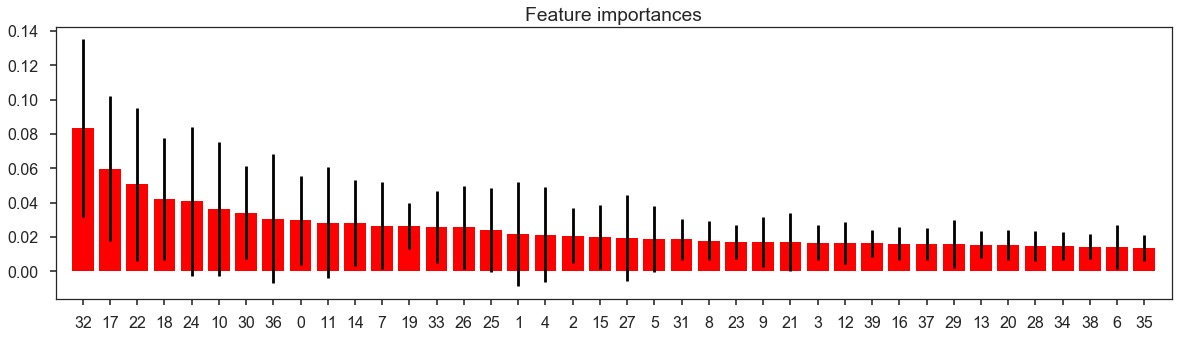

In [46]:
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
X = train_df[sub_seventy_col]
y_train = train_df['target']

forest.fit(X, y_train)
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = (20,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

-

As of July 14th, 2018 there was a revelation within the kaggle community that there was a dataleak where the target values appeared as values within certain columns of the data frame. As of July 16th, 2018 Santander has confirmed this and is currently working on a resolution. This may involve removing the problem from the final scoring dataset, and as such tuning the model more to match highly important features may prove to be detrimental in that case. Thus I'm planning to submit the result from the tuned random forest regressor on the sub_seventy column set as my competition result. 